In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge

from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, KFold

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

# California Housing Prices

https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

https://cursos.alura.com.br/forum/topico-diferenca-entre-score-e-r2_score-103309

https://acervolima.com/python-pontuacao-do-coeficiente-de-determinacao-r2/

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

https://www.alura.com.br/artigos/metricas-de-avaliacao-para-series-temporais

https://medium.com/data-hackers/prevendo-n%C3%BAmeros-entendendo-m%C3%A9tricas-de-regress%C3%A3o-35545e011e70

https://mariofilho.com/rmse-raiz-do-erro-quadratico-medio-em-machine-learning/

About this file
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [3]:
df_housing = pd.read_csv('data/housing.csv')
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
df_housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
pd.get_dummies(df_housing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [9]:
df_housing.drop('ocean_proximity', axis = 1)
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
df_housing = pd.concat([df_housing.drop('ocean_proximity', axis = 1), pd.get_dummies(df_housing['ocean_proximity'])], axis = 1)

In [11]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [12]:

df_housing = df_housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'median_house_value']]
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,False,True,False,False,False,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,False,True,False,False,False,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,False,True,False,False,False,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,False,True,False,False,False,84700.0


Procentagem de linhas faltantes

In [13]:
(207 / len(df_housing)) * 100

1.002906976744186

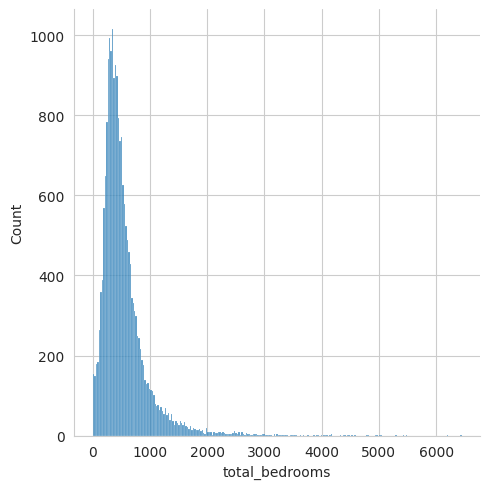

In [14]:
sns.displot(df_housing['total_bedrooms'])

<Axes: xlabel='total_bedrooms'>

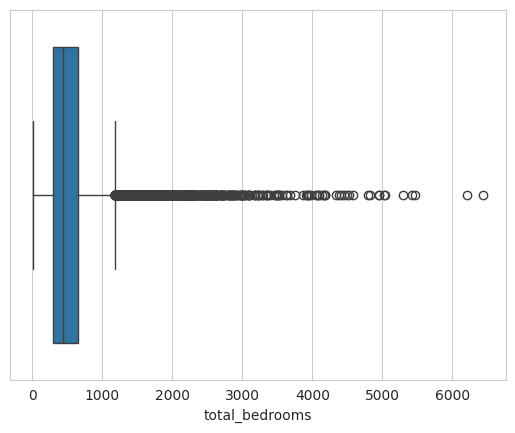

In [15]:
sns.boxplot(x=df_housing['total_bedrooms'])

In [16]:
df_housing['total_bedrooms'].mean(), df_housing['total_bedrooms'].median()

(537.8705525375618, 435.0)

In [17]:
df_housing = df_housing.dropna()
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,False,True,False,False,False,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,False,True,False,False,False,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,False,True,False,False,False,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,False,True,False,False,False,84700.0


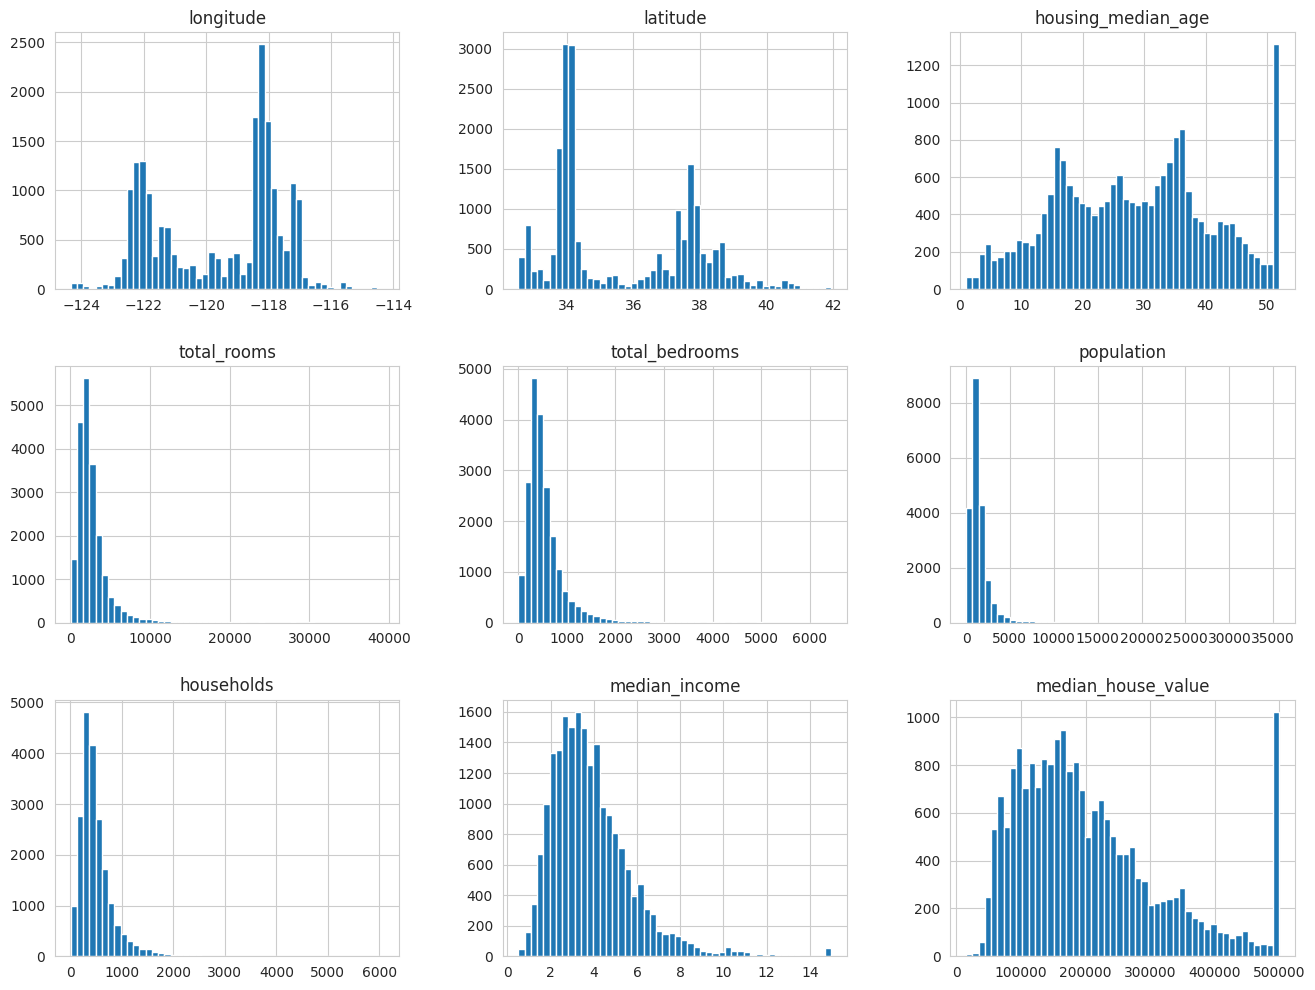

In [18]:
df_housing.hist(figsize = (16, 12), bins = 50);

<Axes: >

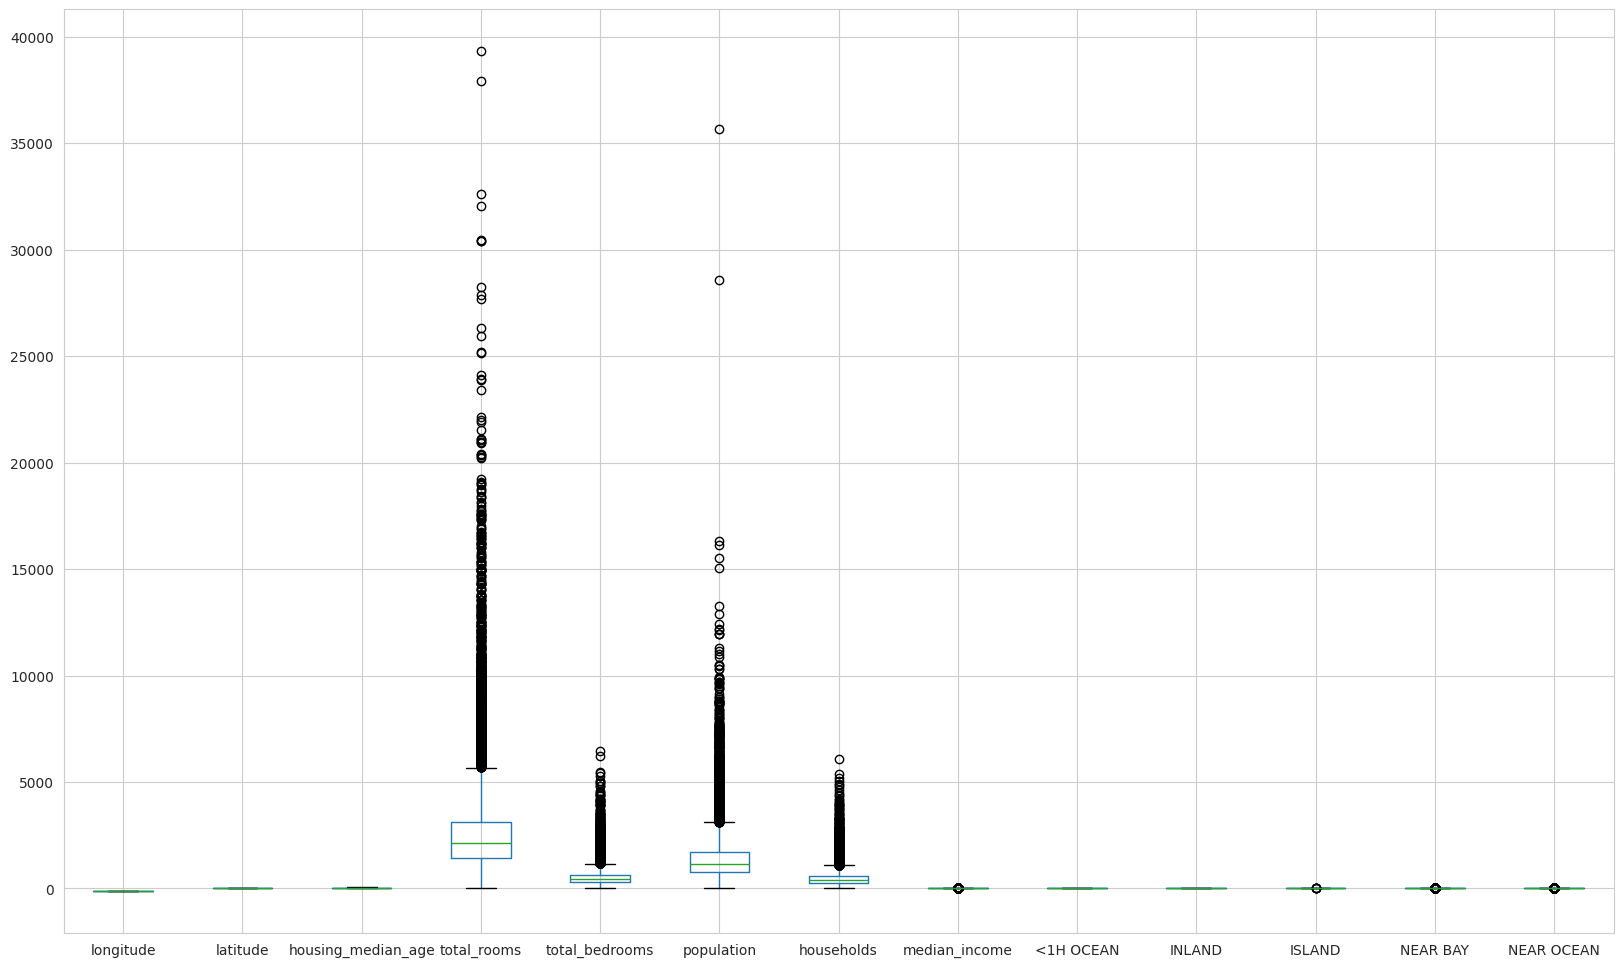

In [19]:
df_housing.drop('median_house_value', axis = 1).boxplot(figsize = (20, 12))

In [20]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

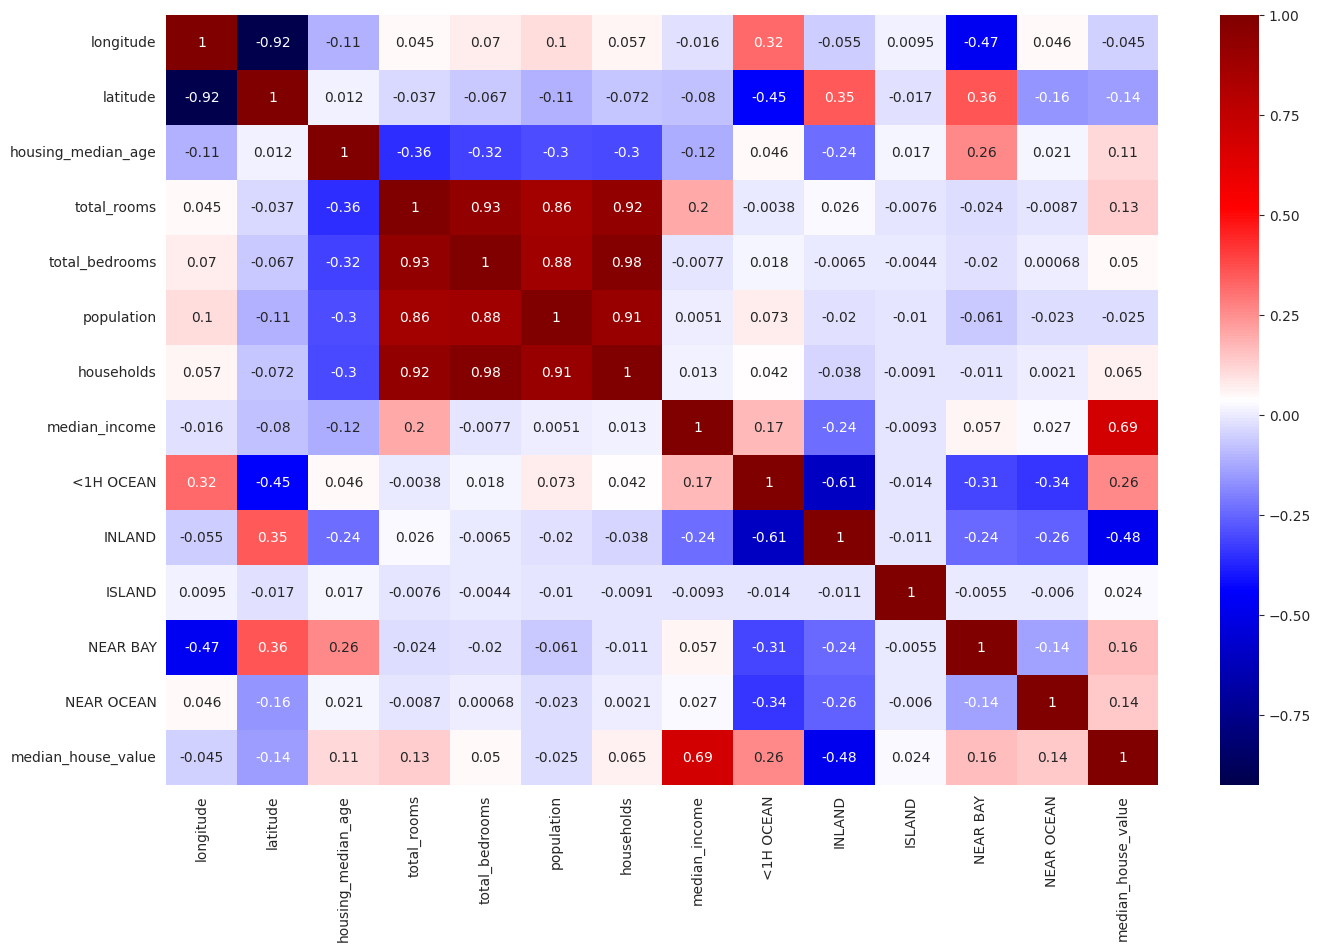

In [21]:
plt.figure(figsize = (16,10))
sns.heatmap(df_housing.corr(), annot = True, cmap = 'seismic')

In [22]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False,342200.0


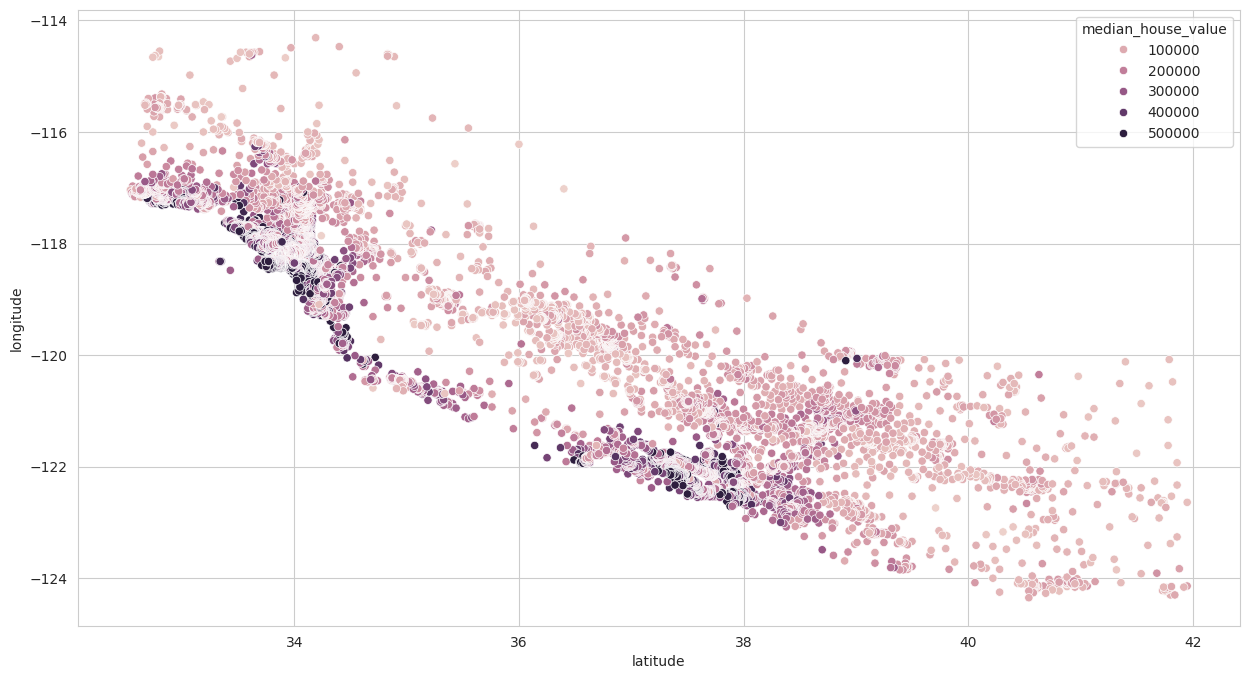

In [23]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = "latitude", y = "longitude", data = df_housing, hue = "median_house_value")#, palette = "seismic")
plt.show()

In [24]:
color_scale = [(0, 'green'), (1,'red')]

fig = px.scatter_mapbox(df_housing, 
                        lat="latitude", 
                        lon="longitude", 
                        # hover_name="Address", 
                        # hover_data=["Address", "median_house_value"],
                        color="median_house_value",
                        color_continuous_scale=color_scale,
                        size="median_house_value",
                        zoom=8, 
                        height=1000,
                        width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [25]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

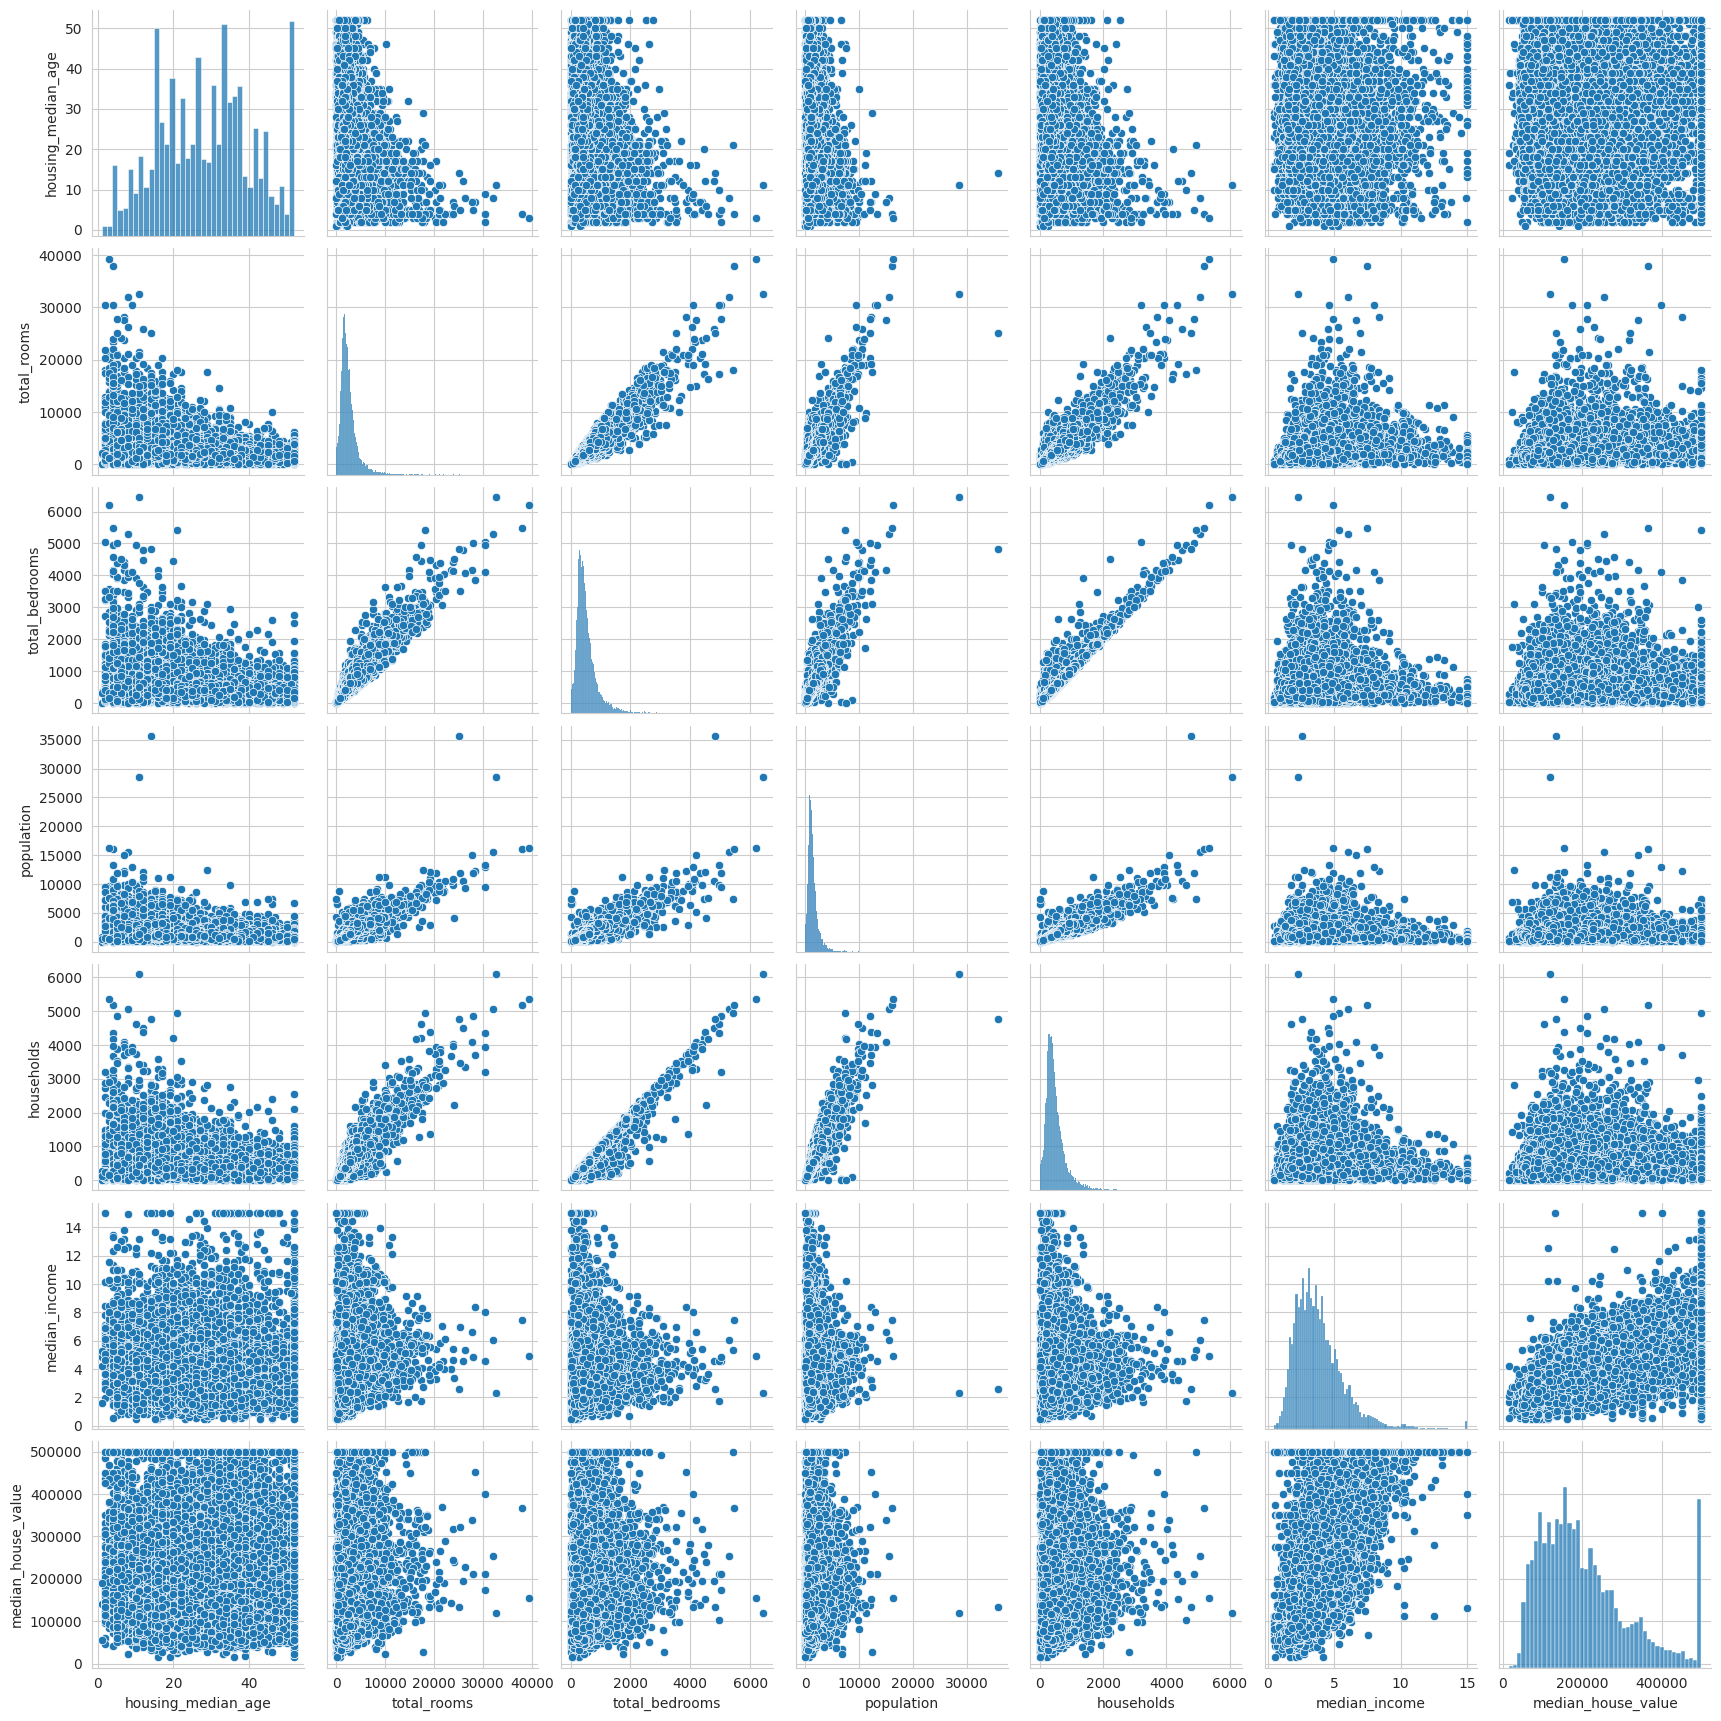

In [26]:
sns.pairplot(df_housing[['housing_median_age', 'total_rooms', 'total_bedrooms', 
                   'population', 'households', 'median_income', 'median_house_value']])

In [35]:
X = df_housing.drop(['median_house_value'], axis = 1)
y = df_housing['median_house_value']
# X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((14303, 13), (6130, 13))

In [28]:
def benchmark_regression(algorithms, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    benchmark_regression = []
    for algorithm_name, algorithm in algorithms.items():
        fit_algorithm = algorithm.fit(X_train, y_train)
        predict_algorithm = fit_algorithm.predict(X_test)
        
        benchmark_regression.append({'algorithm': algorithm_name,
                                     'R2 (%)': round(r2_score(y_test, predict_algorithm) * 100, 2),
                                     'RMSE ($)': round(np.sqrt(mean_squared_error(y_test, predict_algorithm)), 2),
                                     'MAE' : round(np.sqrt(mean_absolute_error(y_test, predict_algorithm)), 2),
                                     'MAPE' : round(mean_absolute_percentage_error(y_test, predict_algorithm) * 100, 2),
                                     })
        
    df_benchmark = pd.DataFrame(benchmark_regression)
    return df_benchmark.sort_values('RMSE ($)')#, ascending=False)

In [29]:
def benchmark_regression_cross_val(algorithms, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    benchmark_regression = []
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    for algorithm_name, algorithm in algorithms.items():
        
        predictions = cross_val_predict(algorithm, X_train, y_train, cv=kfold, n_jobs=-1)

        r2_scores = r2_score(y_train, predictions)
        rmse_scores = np.sqrt(mean_squared_error(y_train, predictions))
        mae_scores = mean_absolute_error(y_train, predictions)
        mape_scores = mean_absolute_percentage_error(y_train, predictions) * 100

        benchmark_regression.append({'algorithm': algorithm_name,
                                     'R2 (%)': round(np.mean(r2_scores) * 100, 2),
                                     'RMSE ($)': round(np.mean(rmse_scores), 2),
                                     'MAE': round(np.mean(mae_scores), 2),
                                     'MAPE': round(np.mean(mape_scores), 2),
                                     })
        
    df_benchmark = pd.DataFrame(benchmark_regression)
    return df_benchmark.sort_values('RMSE ($)')


In [30]:
algorithms = {'LinearRegression': LinearRegression(),
              'RandomForestRegressor': RandomForestRegressor(),
              'ElasticNet': ElasticNet(),
            #   'SVR': SVR(),
              'Ridge': Ridge(),
              'BayesianRidge': BayesianRidge(), 
              }

In [31]:
benchmark_regression(algorithms, X, y)

,algorithm,R2 (%),RMSE ($),MAE,MAPE
1,RandomForestRegressor,82.36,48497.70,177.14,17.61
3,Ridge,65.40,67911.29,222.79,28.74
0,LinearRegression,65.39,67927.64,222.81,28.73
4,BayesianRidge,65.37,67943.48,222.81,28.75
2,ElasticNet,62.27,70920.53,229.72,32.29


In [32]:
benchmark_regression_cross_val(algorithms, X, y)

,algorithm,R2 (%),RMSE ($),MAE,MAPE
1,RandomForestRegressor,81.50,49642.67,32272.43,17.96
0,LinearRegression,64.10,69154.95,49936.97,28.70
3,Ridge,64.09,69162.54,49946.17,28.71
4,BayesianRidge,64.07,69187.97,49964.16,28.72
2,ElasticNet,61.24,71855.95,52760.90,31.82


In [33]:
df_housing['median_house_value'].describe()

count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64